In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

Link Of Dataset :- https://www.kaggle.com/datasets/jainaru/thyroid-disease-data/data

In [ ]:
# Read the dataset
df = pd.read_csv("Thyroid_Diff_2.csv")
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


### Domain Analysis

* Age: The age of the patient at the time of diagnosis or treatment.
* Gender: The gender of the patient (male or female).
* Smoking: Whether the patient is a smoker or not.
* Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).
* Hx Radiotherapy: History of radiotherapy treatment for any condition.
* Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.
* Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
* Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.
* Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
* Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
* Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
* T: Tumor classification based on its size and extent of invasion into nearby structures.
* N: Nodal classification indicating the involvement of lymph nodes.
* M: Metastasis classification indicating the presence or absence of distant metastases.
* Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
* Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.
* Recurred: Indicates whether the cancer has recurred after initial treatment.

In [ ]:
df["Focality"].unique()

array(['Uni-Focal', 'Multi-Focal'], dtype=object)

In [ ]:
# Encode categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [ ]:
# Split the data into features and labels
X = df.drop('Recurred', axis=1)
y = df['Recurred']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

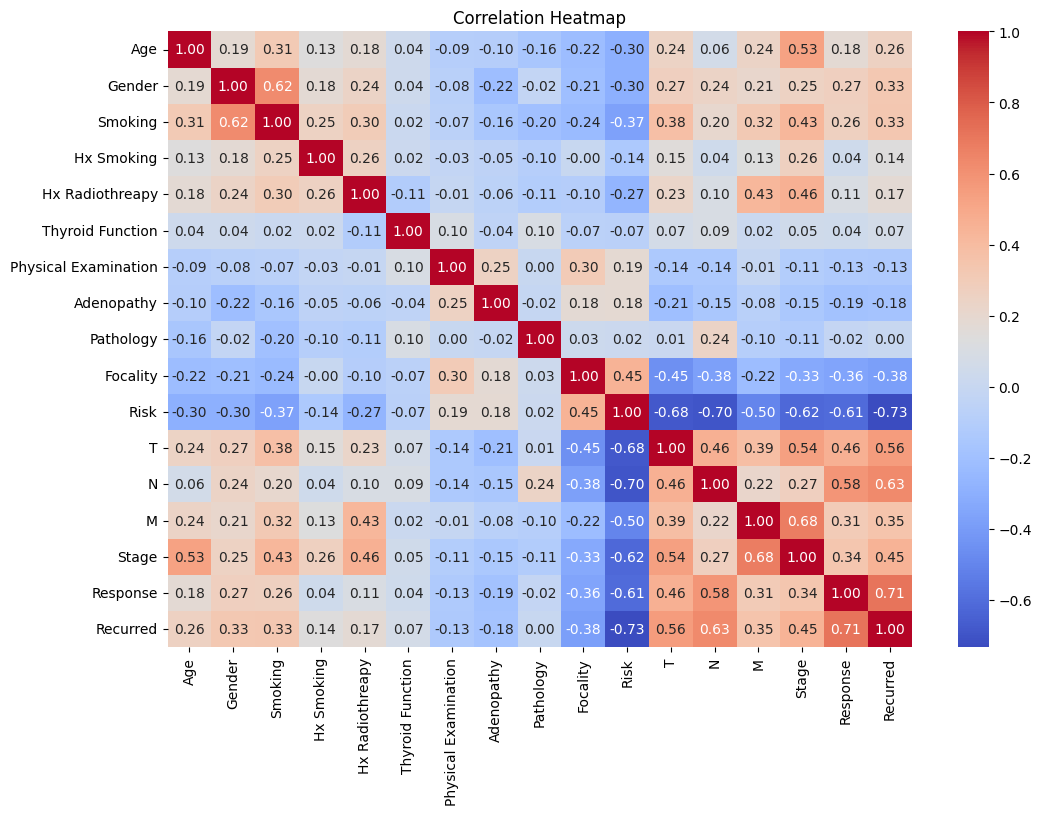

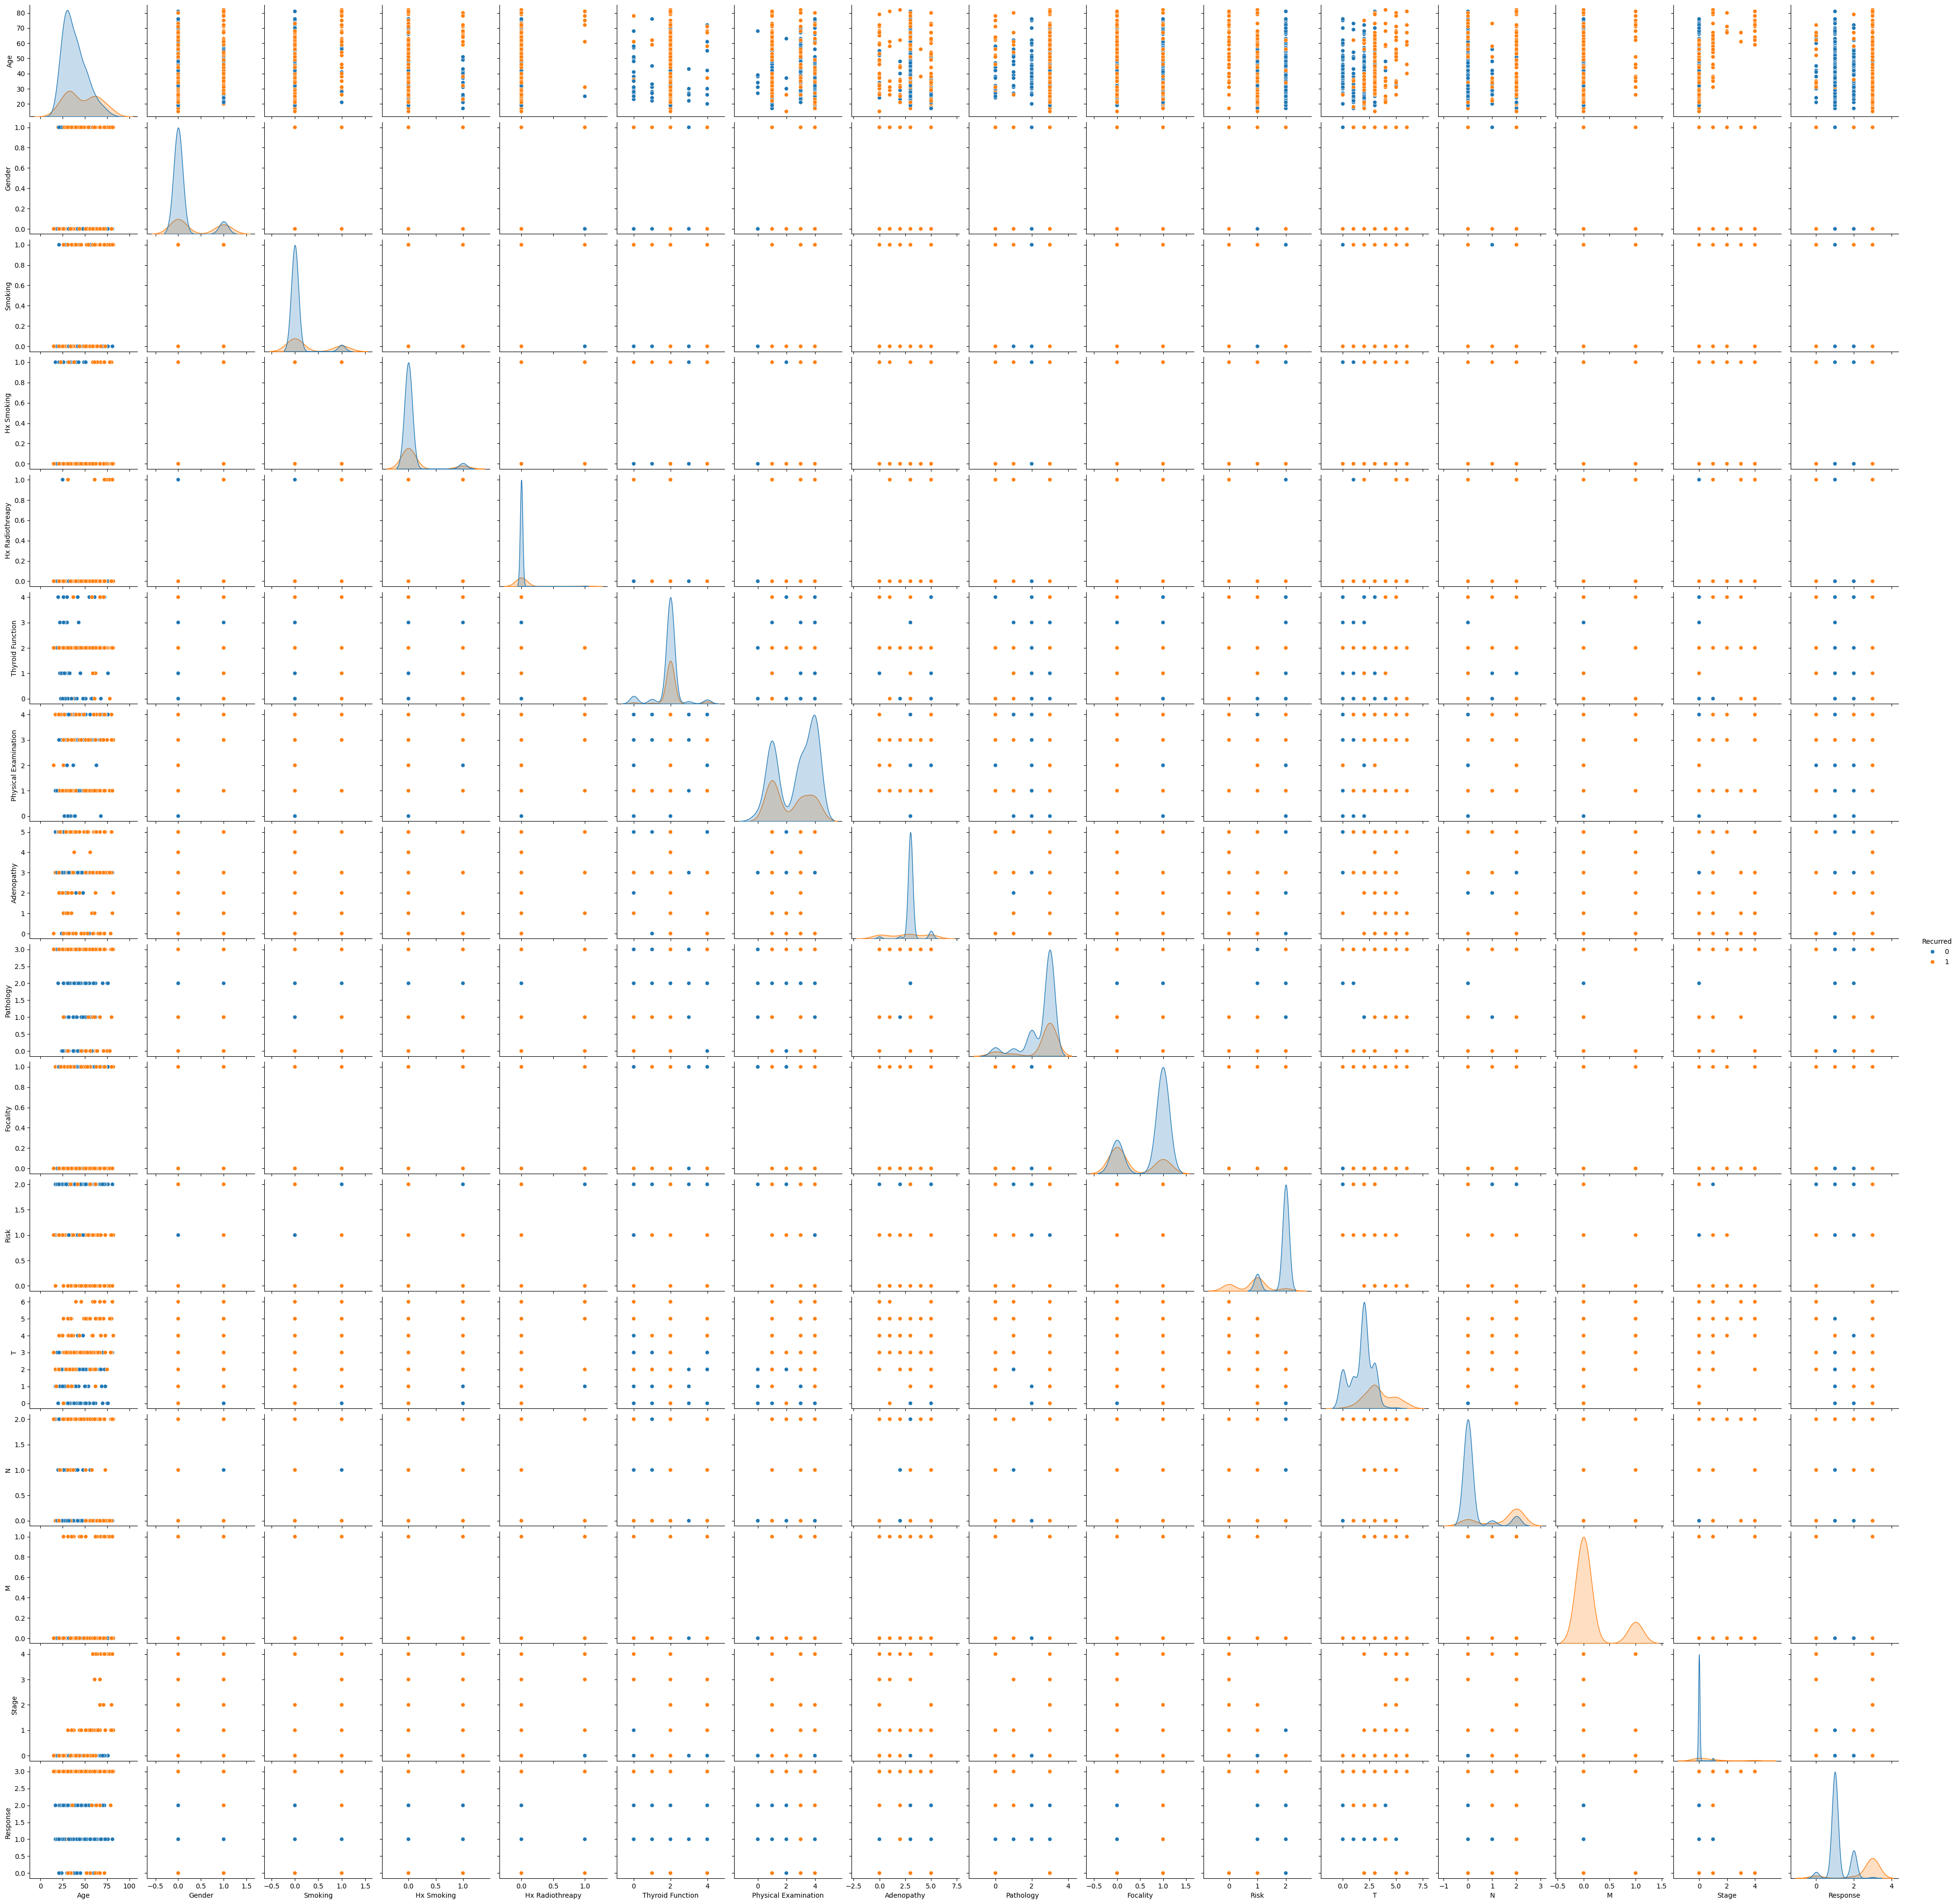

In [ ]:
# Plot a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Plot pair plots to visualize relationships between features
sns.pairplot(df, hue='Recurred', diag_kind='kde')
plt.show()

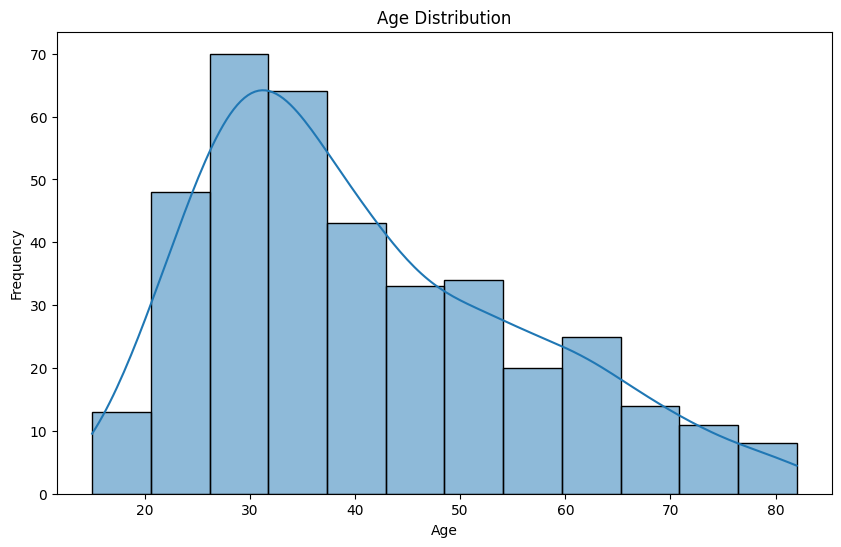

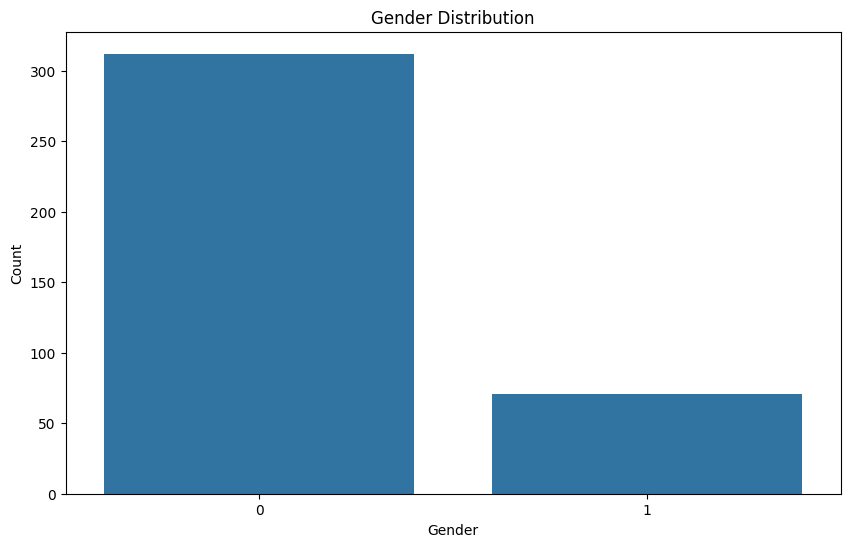

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# Define pipelines
pipeline_log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

pipeline_ada = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', AdaBoostClassifier())
])

pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier())
])

In [ ]:
# Define hyperparameters for GridSearchCV
log_reg_params = {'classifier__C': [0.01, 0.1, 1, 10, 100]}
#dt_params = {'classifier__max_depth': [None, 10, 20, 30, 40, 50]}
rf_params = {'classifier__n_estimators': [10, 50, 100, 200], 'classifier__max_depth': [None, 10, 20, 30]}
ada_params = {'classifier__n_estimators': [10, 50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1, 10]}
gb_params = {'classifier__n_estimators': [10, 50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1, 10], 'classifier__max_depth': [3, 5, 7]}

In [ ]:
dt_params = {
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__criterion': ['gini', 'entropy']
}

In [ ]:
# Perform GridSearchCV for each model
models = {
    'Logistic Regression': (pipeline_log_reg, log_reg_params),
    'Decision Tree': (pipeline_dt, dt_params),
    'Random Forest': (pipeline_rf, rf_params),
    'AdaBoost': (pipeline_ada, ada_params),
    'Gradient Boosting': (pipeline_gb, gb_params)
}

for model_name, (pipeline, params) in models.items():
    grid = GridSearchCV(pipeline, params, cv=5)
    grid.fit(X_train, y_train)
    print(f"{model_name} Best Parameters:", grid.best_params_)
    y_pred = grid.predict(X_test)
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Best Parameters: {'classifier__C': 0.1}
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.94      0.79      0.86        19

    accuracy                           0.94        77
   macro avg       0.94      0.89      0.91        77
weighted avg       0.94      0.94      0.93        77

Decision Tree Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 30}
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        58
           1       0.94      0.89      0.92        19

    accuracy                           0.96        77
   macro avg       0.96      0.94      0.95        77
weighted avg       0.96      0.96      0.96        77

Random Forest Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 10}
Random Forest 

### Define Models: First, define the machine learning models to evaluate. This includes setting up pipelines that encapsulate both the preprocessing steps (like scaling or encoding) and the classifier itself.

### Define Hyperparameters: After defining the models, specify the hyperparameters that needs to be tune for each model. Hyperparameters are parameters that are not directly learned from the data but affect the learning process (e.g., regularization strength, tree depth, number of estimators).

### GridSearchCV Setup: set up GridSearchCV instances for each model. GridSearchCV is used to systematically search through a grid of hyperparameters and find the best combination that maximizes the performance metric (like accuracy or F1-score) through cross-validation.

### Fit and Evaluate: Finally, fit each GridSearchCV instance on training data. This process trains each model with different hyperparameter combinations and evaluates their performance using cross-validation. After training, you can access the best parameters found by GridSearchCV and evaluate the model's performance on unseen test data.